# Filtering

### Setup

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

### Using filters in the SDK

Using the `list_runs` method in the SDK or `/runs/query` endpoint in the API, you can filter runs to analyze and export.

Let's paste in the raw query we copied from the UI

In [2]:
raw_query = """eq(name, "call_openai")"""

In [3]:
from langsmith import Client
from datetime import datetime, timedelta

client = Client()
runs = client.list_runs(
  project_name="langsmith-academy", 
  filter=raw_query,
  start_time=datetime.now() - timedelta(days=1),
)
for run in runs:
    print(run)

id=UUID('460c7b59-56d0-4ad8-a9c0-05d14dea133b') name='call_openai' start_time=datetime.datetime(2024, 12, 17, 14, 50, 30, 911206) run_type='llm' end_time=datetime.datetime(2024, 12, 17, 14, 50, 33, 784009) extra={'metadata': {'ls_method': 'traceable', 'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'revision_id': '8a08739-dirty'}, 'runtime': {'sdk': 'langsmith-py', 'sdk_version': '0.2.3', 'library': 'langsmith', 'platform': 'macOS-14.5-arm64-arm-64bit', 'runtime': 'python', 'py_implementation': 'CPython', 'runtime_version': '3.10.11', 'langchain_version': '0.3.12', 'langchain_core_version': '0.3.25'}} error=None serialized=None events=[] inputs={'messages': [{'content': "You are an assistant for question-answering tasks. \nUse the following pieces of retrieved context to answer the latest question in the conversation. \nIf you don't know the answer, just say that you don't know. \nUse three sentences maximum and keep the answer concise.\n\nWhenever possible, provide a Python c

You can also pass in trace or tree filters too!

In [4]:
client.list_runs(
  project_name="langsmith-academy", 
  filter="eq(is_root, true)",
  # trace_filter=""
  # tree_filter=""
)
for run in runs:
    print(run)

![Screenshot 2024-12-17 at 9.12.08 AM.png](<attachment:Screenshot 2024-12-17 at 9.12.08 AM.png>)
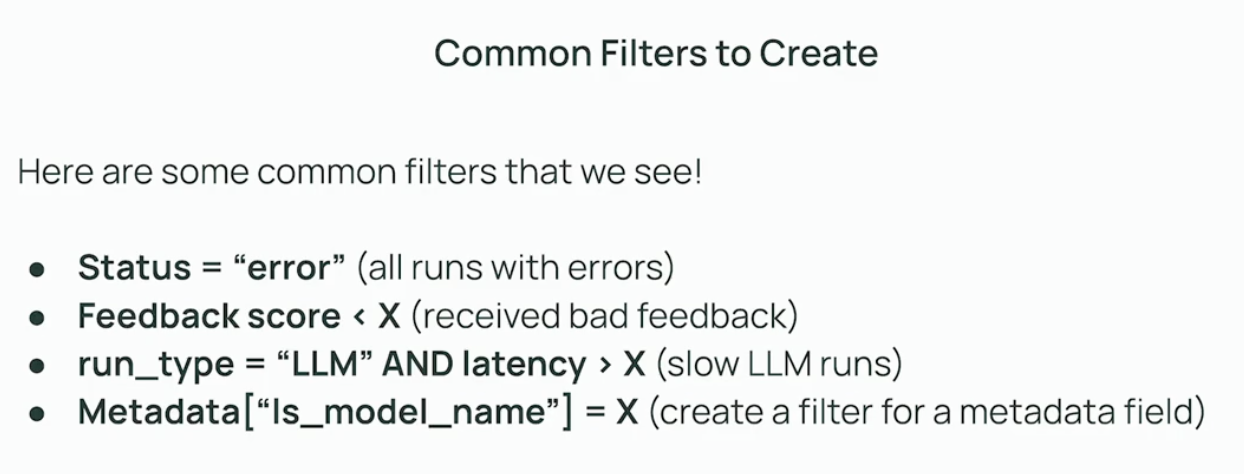